## 加载路透社数据集

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## 将索引解码为新闻文本

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 注意，索引减去了 3，因为 0、1、2 是为“padding”（填充）、“start of sequence”（序列开始）、“unknown”（未知词）分别保留的索引
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [12]:
train_labels[10]

3

## 编码数据

In [23]:
import numpy as np

def veictorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [149]:
# 正文无关，个人试试 numpy 数组转换的一些过程（容易搞混）
tmp = np.zeros((3, 10))
tmp[0] = 1
tmp[0][1] = 2
tmp[1, 2] = 3
print(tmp, '\n')

tmp = np.random.randint(4, size=(3,4))
print(tmp, '\n')

# rrrr = np.zeros((3,4))
# for i, s in enumerate(tmp):
#     rrrr[i,s] = 1.
# print(rrrr, '\n')

# 其实很简单，就是用 one-hot 编码，初始化形状和 tmp 一样的全零(向量?张量?)
# 这里举个例子 tmp[1]=[2 1 2 2]，rrrr[0, tmp[1]] 就是让：
# rrrr[0,2] = 1. | rrrr[0,1] = 1. | rrrr[0,2] = 1. | rrrr[0,2] = 1.
# 覆盖在 [0 0 0 0] 就是 [0. 1. 1. 0.]
rrrr = np.zeros((3,4))
rrrr[0, tmp[1]] = 1.
print(rrrr)

[[1. 2. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 

[[0 3 3 1]
 [2 1 2 2]
 [0 1 0 3]] 

[[0. 1. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


x_train = vectorize_sequences(train_data)  # 将训练标签向量化
x_test = vectorize_sequences(test_data)    # 将测试标签向量化

In [101]:
# 将标签向量化有两种方法：可以将标签列表转换为整数张量，或用one-hot编码。
# one-hot编码是分类数据广泛使用的一种格式，也叫分类编码（categorical encoding）。
# 详细解释请看书，这个例子中，one-hot 编码就是将每个标签表示为全零向量，只有标签索引对应的元素为1

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [100]:
# 注意，Keras 内置方法可以实现这个操作（如上），在 MNIST 例子中已经见过这种方法

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 模型定义

In [103]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

## 编译模型

In [106]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 留出验证集

In [107]:
# 留出 1000 个样本作为验证集

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## 训练模型

In [108]:
# 开始训练网络，共 20 个轮次

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 147us/step - loss: 2.6795 - acc: 0.5073 - val_loss: 1.7595 - val_acc: 0.6360
Epoch 2/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.4417 - acc: 0.7023 - val_loss: 1.2969 - val_acc: 0.7220
Epoch 3/20
7982/7982 [==============================] - 1s 127us/step - loss: 1.0662 - acc: 0.7701 - val_loss: 1.1213 - val_acc: 0.7590
Epoch 4/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.8406 - acc: 0.8206 - val_loss: 1.0317 - val_acc: 0.7860
Epoch 5/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.6696 - acc: 0.8548 - val_loss: 0.9808 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.5361 - acc: 0.8880 - val_loss: 0.9528 - val_acc: 0.8010
Epoch 7/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.4295 - acc: 0.9095 - val_loss: 0.9283 - val_acc: 0.8230


## 绘制训练损失和验证损失

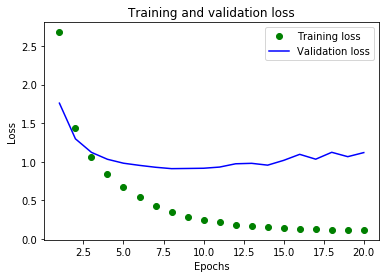

In [110]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 绘制训练精度和验证精度

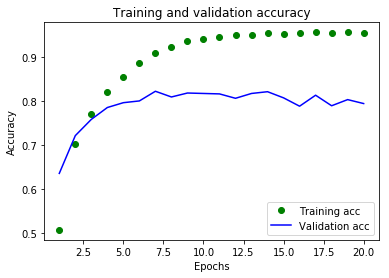

In [111]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
## 网络在训练9轮后开始过拟合，我们从头开始训练一个新网络，共9个轮次，然后在测试集上评估模型

## 从头开始重新训练一个模型

In [113]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 116us/step - loss: 2.5749 - acc: 0.5332 - val_loss: 1.7438 - val_acc: 0.6640
Epoch 2/9
7982/7982 [==============================] - 1s 87us/step - loss: 1.4088 - acc: 0.7121 - val_loss: 1.3122 - val_acc: 0.7220
Epoch 3/9
7982/7982 [==============================] - 1s 90us/step - loss: 1.0423 - acc: 0.7781 - val_loss: 1.1363 - val_acc: 0.7590
Epoch 4/9
7982/7982 [==============================] - 1s 88us/step - loss: 0.8165 - acc: 0.8301 - val_loss: 1.0395 - val_acc: 0.7740
Epoch 5/9
7982/7982 [==============================] - 1s 89us/step - loss: 0.6458 - acc: 0.8673 - val_loss: 0.9675 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 1s 92us/step - loss: 0.5148 - acc: 0.8976 - val_loss: 0.9376 - val_acc: 0.8020
Epoch 7/9
7982/7982 [==============================] - 1s 88us/step - loss: 0.4150 - acc: 0.9158 - val_loss: 0.9020 - val_acc: 0.8120
Epoch 8/9
798

In [114]:
# 返回数组前面是loss，后面是acc，0.99在这测试集里应该不算大
results

[0.9972119893968264, 0.7871772039180766]

In [143]:
# 上面训练得到约80%的精度。对于平衡的二分类问题，完全随机的分类器能得到50%的精度。
# 但在这个例子里，完全随机的精度约为19%，所以上述结果相当不错，至少和随机的基准比起来还不错

import copy
test_labels_copy = copy.copy(test_labels)

# shuffle 是打乱顺序，多维矩阵中，只对第一维（行）做打乱顺序操作：
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)

# 下一行代码其实就是两个形状一样的 array 逐个元素比较，然后生成一个包含比对结果（True 或 False）形状一样的 array
print(np.sum(np.array([1,2]) == np.array([1,3])))

print(float(np.sum(hits_array)) / len(test_labels))

1
0.18388245770258238


In [153]:
x_test[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [155]:
one_hot_test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [156]:
test_labels

array([ 3, 13,  4, ...,  3, 20,  3])

In [157]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 在新数据上生成预测结果

In [161]:
predictions = model.predict(x_test)

# predictions中的每个元素都是长度为46的向量
predictions[0].shape

(46,)

In [164]:
# 这个向量的所有元素总和是1
np.sum(predictions[0])

0.9999998

In [167]:
# 最大的元素就是预测类别，即概率最大的类别
np.argmax(predictions[0])

3

## 具有信息瓶颈的模型

In [169]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 122us/step - loss: 3.5899 - acc: 0.2742 - val_loss: 3.3787 - val_acc: 0.3260
Epoch 2/20
7982/7982 [==============================] - 1s 85us/step - loss: 3.0670 - acc: 0.3477 - val_loss: 2.8914 - val_acc: 0.3060
Epoch 3/20
7982/7982 [==============================] - 1s 87us/step - loss: 2.5381 - acc: 0.3183 - val_loss: 2.5064 - val_acc: 0.2970
Epoch 4/20
7982/7982 [==============================] - 1s 88us/step - loss: 2.1288 - acc: 0.3494 - val_loss: 2.1172 - val_acc: 0.3330
Epoch 5/20
7982/7982 [==============================] - 1s 88us/step - loss: 1.6110 - acc: 0.4648 - val_loss: 1.6660 - val_acc: 0.6510
Epoch 6/20
7982/7982 [==============================] - 1s 87us/step - loss: 1.2287 - acc: 0.7186 - val_loss: 1.4793 - val_acc: 0.6660
Epoch 7/20
7982/7982 [==============================] - 1s 87us/step - loss: 1.0788 - acc: 0.7285 - val_loss: 1.4785 - val_acc: 0.6680
Epoch 

上面的网络的验证精度最大约为68%，比前面下降了13%。导致这一下降的主要原因在于，我们试图将大量信息（这些信息足够恢复46个类别的分割超平面）压缩到维度很小的中间空间。网络能够将 __大部分__ 必要信息塞入这个四维表示中，但并不是全部信息。